# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [9]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [151]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [78]:
customers.shape

(440, 8)

In [27]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

- Channel -> this is probably the channel used by customers, if it is online or at the store
- Region -> area where the supermarket is located
- The rest of the variables are the product categories that customers buy at each supermarket, with the values being the ammount of money spent on each category

In [20]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
customers.dtypes
# All variables are numerical, so no transformation is needed

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [18]:
customers.isnull().sum()
# No null values in dataset

Channel       0
Region        0
Fresh         0
Milk          0
Grocery       0
Frozen        0
Delicassen    0
dtype: int64

### Correlation matrix

<AxesSubplot:>

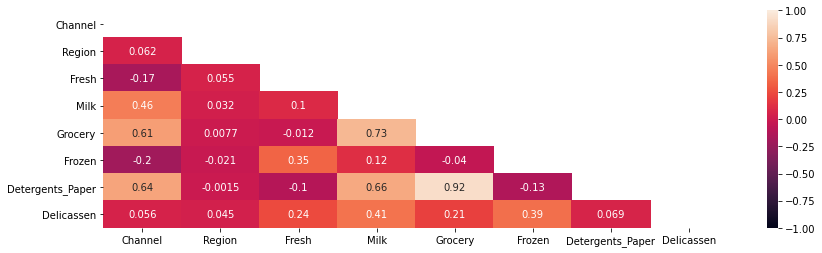

In [10]:
plt.figure(figsize=(14, 4))

mask = np.triu(np.ones_like(customers.corr(), dtype=np.bool))

sns.heatmap(customers.corr(), vmin=-1, vmax=1, mask=mask, annot=True )

# There are no strong correlations between variables (>90) except for Grocery and Detergent_Paper, which could be because when
# families and individuals do the monthly shoping they buy everthing needed at home, which usually includes cleaning products
# and what they usually have in their home to eat and use (grocerires). Even though the correlation is strong, I would not 
# delete neither of the variables as they are not the same products. Groceries are food products while Detergent_Paper are
# probably cleaning products. 

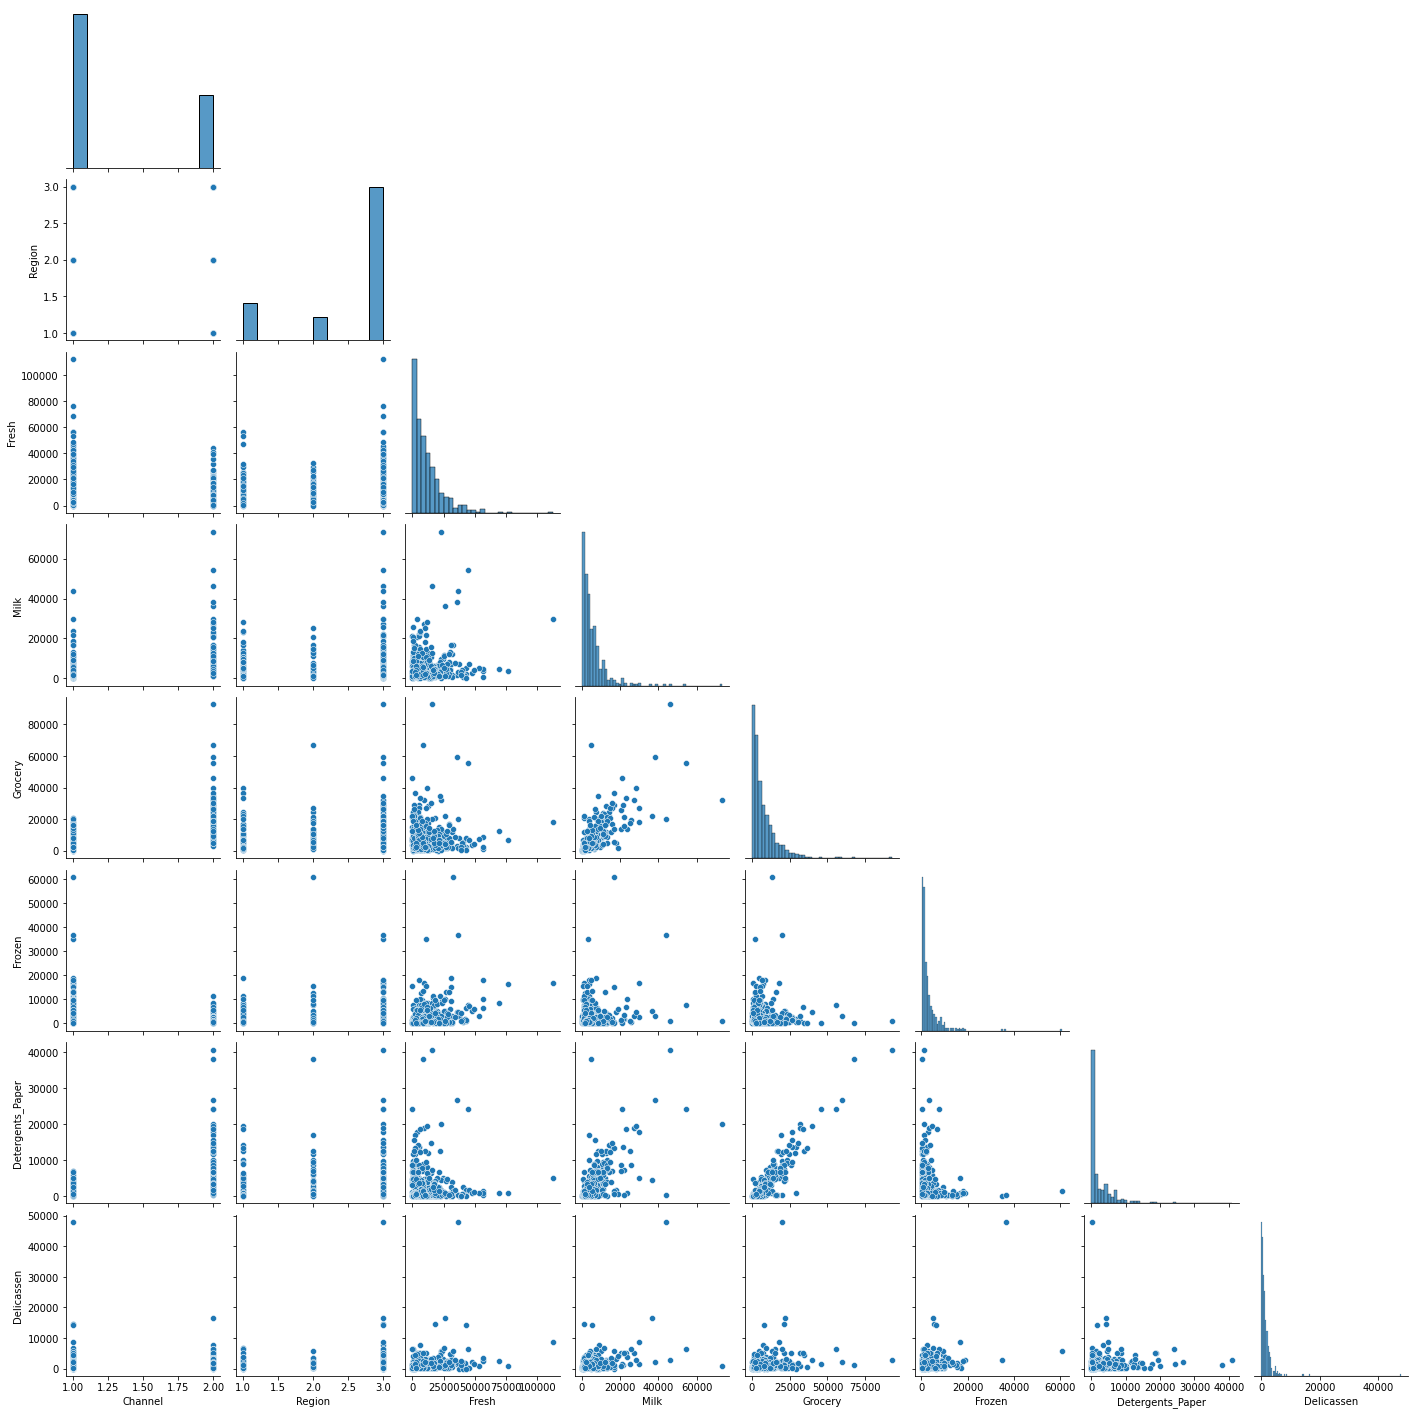

In [31]:
sns.pairplot(customers, corner = True)

# It seems like there are a few outliers. Lets check it in more depth

### Outliers analysis

In [175]:
def two_plots(series_a, series_b, series_c):   
    fig, ax = plt.subplots(1,3, figsize = (20,5), sharey = True)
    ax[0].hist(series_a, bins=10, color = 'b')
    ax[1].hist(series_b, bins=10, color = 'y')
    ax[2].hist(series_c, bins=10, color = 'y')
    return plt.show()

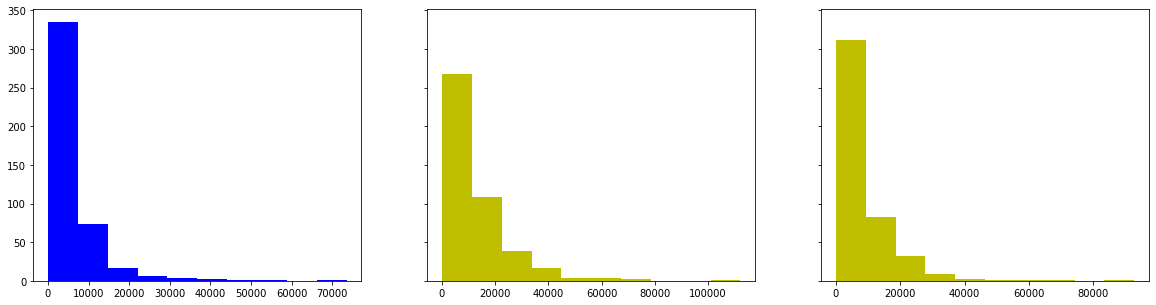

In [176]:
two_plots(customers.Milk, customers.Fresh, customers.Grocery)
# We can see that the rage of values is quite extense, ranging from 0 to 70000 in Milk, for exmaple. 

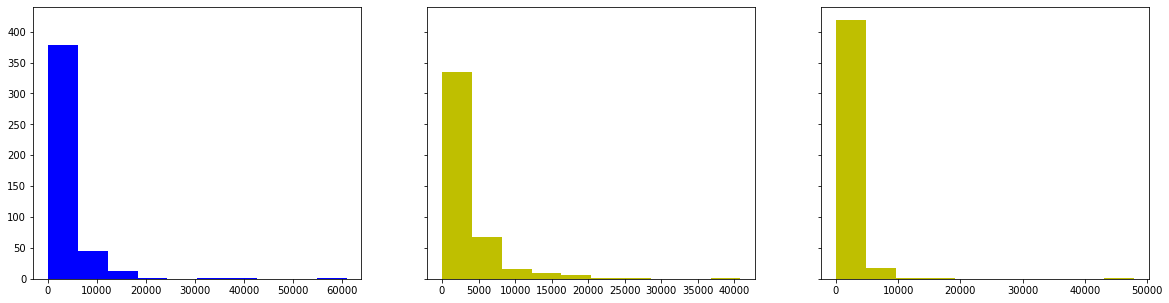

In [177]:
two_plots(customers.Frozen, customers.Detergents_Paper, customers.Delicassen)

#### We can see that, as was suspected, there are certain outliers in the the dataset. In order to properly identify them, we are going to use IQ range with the following function

In [179]:
customers = customers.drop(customers[customers.Delicassen > 10000].index)

In [183]:
customers = customers.drop(customers[customers.Grocery > 37000].index)

In [202]:
customers = customers.drop(customers[customers.Frozen > 10000].index)

In [191]:
customers = customers.drop(customers[customers.Milk > 30000].index)

In [194]:
customers = customers.drop(customers[customers.Fresh > 60000].index)

In [203]:
customers.shape

# After this first ouliers cleaning we have deleted only 33 values, which is not too much.
# In the following graphs we can see that our data is more focused now

(407, 8)

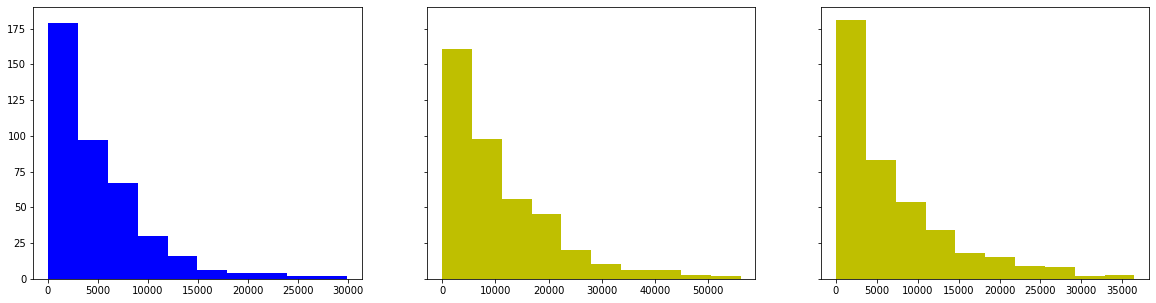

In [204]:
two_plots(customers.Milk, customers.Fresh, customers.Grocery)

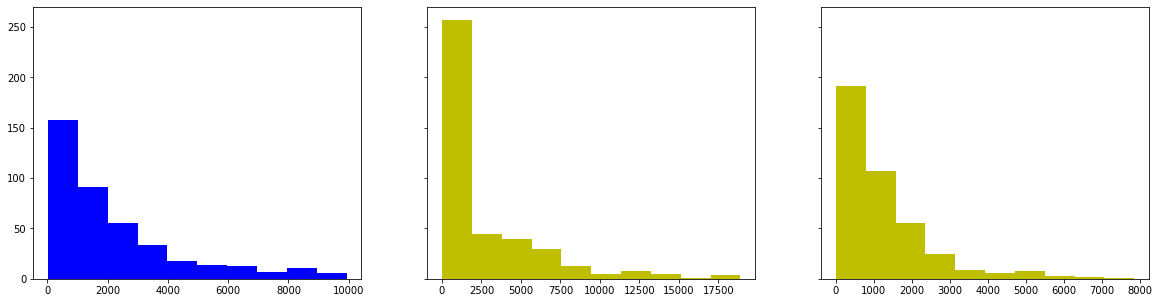

In [205]:
two_plots(customers.Frozen, customers.Detergents_Paper, customers.Delicassen)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [207]:
# The outliers cleaning has been done in the previous section

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [209]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scale = StandardScaler()

scale.fit(customers)

customers_scale = pd.DataFrame(scale.transform(customers), columns = customers.columns)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [282]:
k_means = KMeans()

k_means.fit(customers_scale)

customers_scale["clusters"] = k_means.labels_

In [225]:
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,1.435322,0.59275,0.193410,0.955003,0.066652,-0.904862,0.028206,0.076069,1
1,1.435322,0.59275,-0.357816,0.986805,0.356214,-0.210742,0.203419,0.427841,1
2,1.435322,0.59275,-0.426965,0.779884,0.084398,0.077577,0.266542,5.301249,4
3,-0.696708,0.59275,0.251950,-0.792053,-0.415230,1.870719,-0.585183,0.437478,6
4,1.435322,0.59275,1.170333,0.078171,0.014280,0.754658,-0.225698,3.165720,4


Count the values in `labels`.

In [226]:
customers_scale.clusters.value_counts()
# We can see that the most popular number of clusters is 2, which we can check in the next elbow plot

2    137
1     84
3     69
6     33
0     32
7     30
4     12
5     10
Name: clusters, dtype: int64

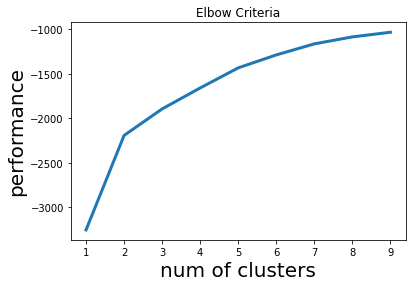

In [216]:
from sklearn.cluster import KMeans

Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(customers_scale).score(customers_scale) for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

# In this elbow graph we can see that the optimal number of clusters is 2 or 6, as it is the point where the change is more drastic

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [229]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 0.5)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN"] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [231]:
customers_scale.labels_DBSCAN.value_counts()

-1    339
 0     68
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [266]:
def scatter_plot(series_a, series_b, column):
    fig, ax = plt.subplots(2 ,figsize=(15, 10))
    plt.subplots_adjust(hspace = 0.6)

    ax[0].scatter(series_a, series_b, c = customers_scale.clusters)
    ax[0].set_xlabel(f"{column} - Labels")

    ax[1].scatter(series_a, series_b, c = customers_scale.labels_DBSCAN)
    ax[1].set_xlabel(f"{column} - Labels_DBSCAN")

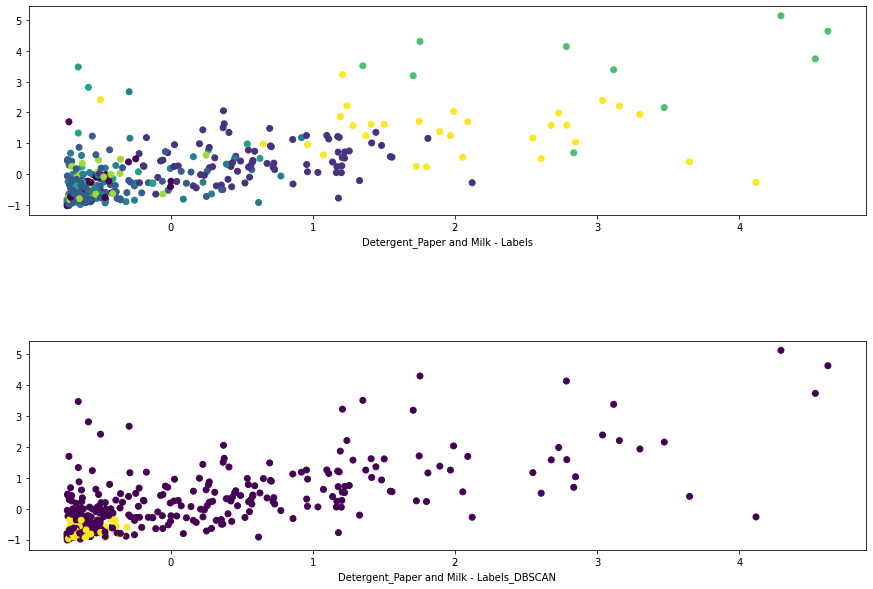

In [267]:
scatter_plot(customers_scale.Detergents_Paper, customers_scale.Milk, 'Detergent_Paper and Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

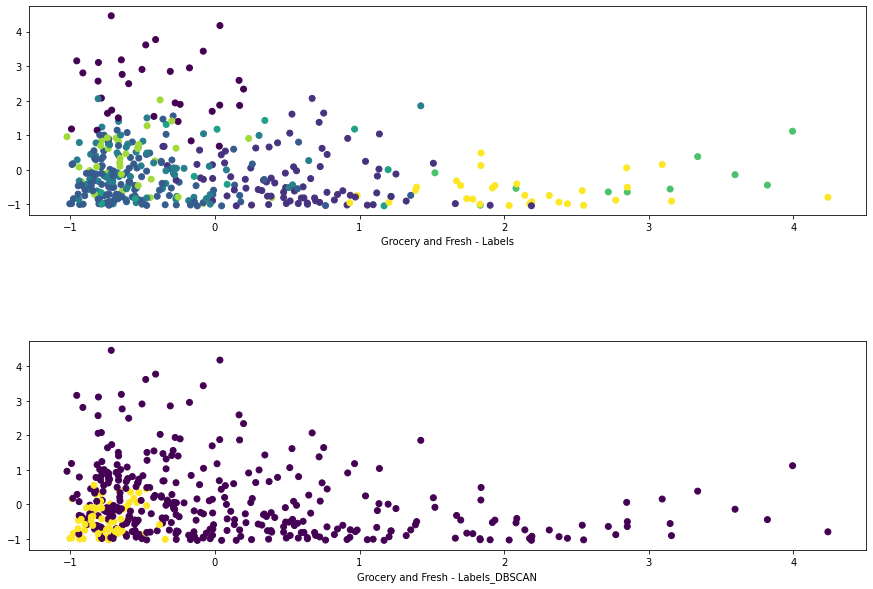

In [268]:
scatter_plot(customers_scale.Grocery, customers_scale.Fresh, "Grocery and Fresh")

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

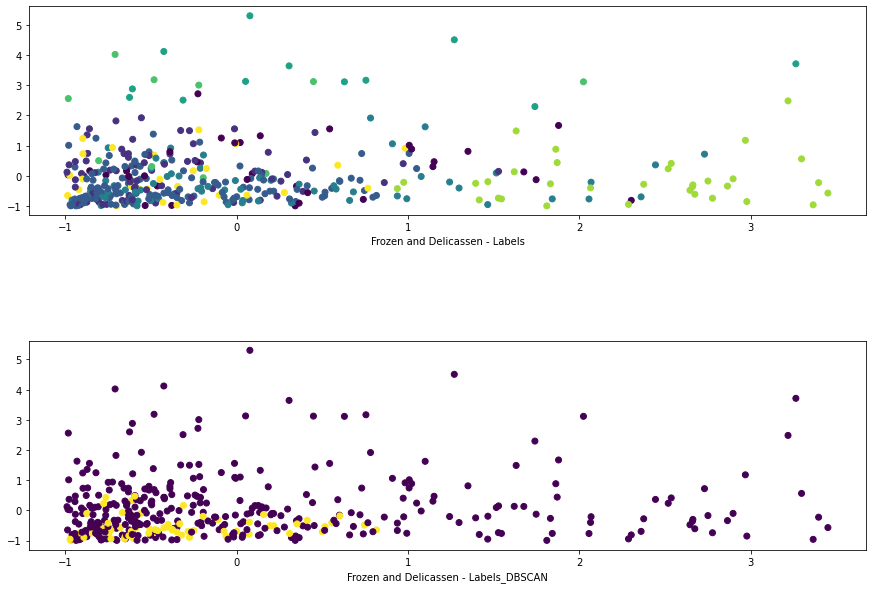

In [269]:
scatter_plot(customers_scale.Frozen, customers_scale.Delicassen, "Frozen and Delicassen")

#### In this plots we can see that the differentiation is clearer in the DBSCAN. Not only are the two groups better defined, the points are more concentrated inside each group

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [277]:
customers_scale.groupby("clusters").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
clusters,,,,,,,,,
0,-0.563456,0.231839,2.376956,-0.326017,-0.422502,0.331314,-0.540708,0.282173,-1.00000
1,1.359178,0.378877,-0.244956,0.442318,0.549541,-0.463180,0.623075,0.037318,-1.00000
2,-0.681145,0.536550,-0.295496,-0.526768,-0.559896,-0.386616,-0.539036,-0.357400,-0.50365
3,-0.573112,-1.731962,-0.036671,-0.408847,-0.448367,0.159036,-0.445217,-0.249770,-1.00000
4,0.013969,0.165003,0.036818,0.763088,0.047524,0.510393,-0.258250,3.413754,-1.00000
5,1.435322,0.207778,-0.263031,3.488482,2.891303,-0.124291,3.047116,1.982465,-1.00000
6,-0.632101,0.476092,0.264297,-0.374294,-0.559646,2.311358,-0.545143,-0.127416,-1.00000
7,1.435322,-0.433843,-0.633547,1.398843,2.132892,-0.361957,2.004996,-0.085040,-1.00000


In [271]:
customers_scale.groupby("labels_DBSCAN").mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
labels_DBSCAN,,,,,,,,,
-1,0.139753,-0.11890,0.082810,0.148330,0.150569,0.074387,0.124538,0.111987,2.758112
0,-0.696708,0.59275,-0.412834,-0.739467,-0.750629,-0.370840,-0.620857,-0.558288,2.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [286]:
from sklearn.manifold import TSNE

In [300]:
tsne = TSNE(n_components=2, perplexity=200)
transformed_X = tsne.fit_transform(customers_scale)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

In [294]:
customers_scale = pd.concat([customers_scale, data], axis = 1)

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


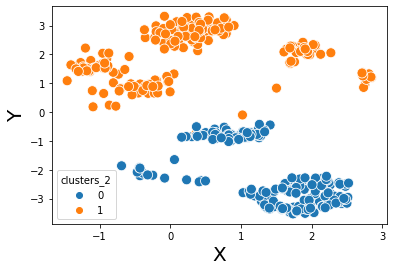

In [364]:
k_means = KMeans(n_clusters = 2, random_state = 0)

k_means.fit(customers_scale)

customers_scale["clusters_2"] = k_means.labels_

k_means.fit(customers_scale)

sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue='clusters_2')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [302]:
k_means = KMeans(n_clusters=4, 
                 random_state=0)

k_means.fit(customers_scale)

customers_scale["clusters_4"] = k_means.labels_

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


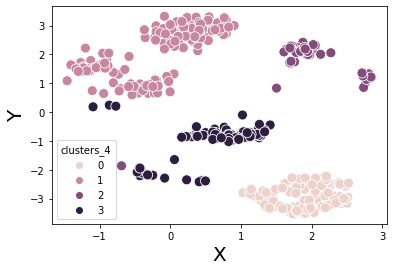

In [304]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue='clusters_4')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [305]:
k_means = KMeans(n_clusters=5, 
                 random_state=0)

k_means.fit(customers_scale)

customers_scale["clusters_5"] = k_means.labels_

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


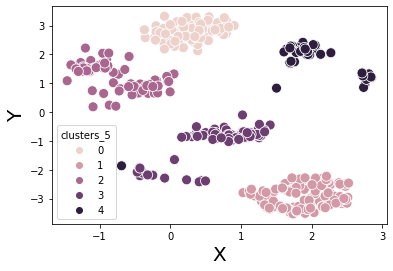

In [307]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue='clusters_5')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [309]:
k_means = KMeans(n_clusters=6, 
                 random_state=0)

k_means.fit(customers_scale)

customers_scale["clusters_6"] = k_means.labels_

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


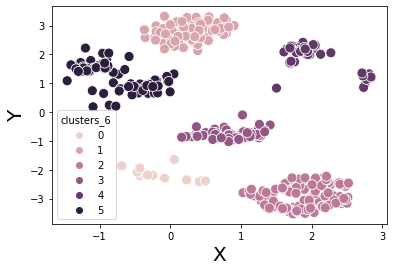

In [313]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue='clusters_6')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [315]:
# I believe the best divison would be in 6 clusters

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


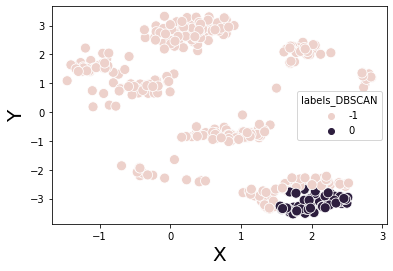

In [323]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [357]:
dbscan = DBSCAN(eps=0.3, min_samples = 20)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN_0.3"] = dbscan.labels_


c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


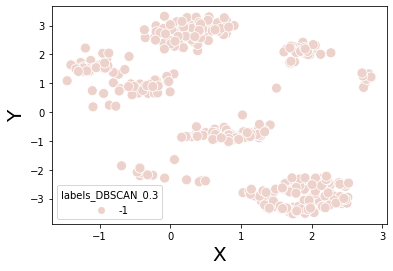

In [358]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN_0.3")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [355]:
dbscan = DBSCAN(eps=0.7, min_samples = 20)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN_0.7"] = dbscan.labels_


c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


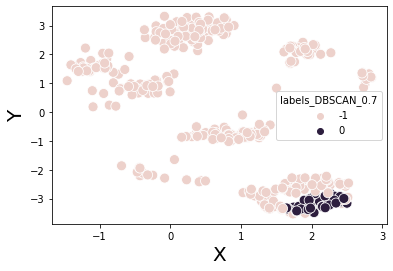

In [356]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN_0.7")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [353]:
dbscan = DBSCAN(eps=1.3, min_samples = 20)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN_1.3"] = dbscan.labels_

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


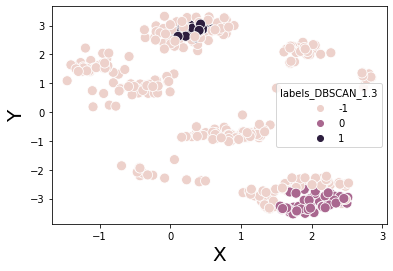

In [354]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN_1.3")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [361]:
dbscan = DBSCAN(eps=1.5, min_samples = 20)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN_1.5"] = dbscan.labels_

c:\users\juanp\anaconda3\envs\ironhack\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


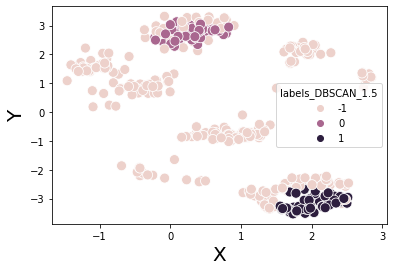

In [352]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN_1.5")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [360]:
dbscan = DBSCAN(eps=2, min_samples = 20)

dbscan.fit(customers_scale)

customers_scale["labels_DBSCAN_2"] = dbscan.labels_

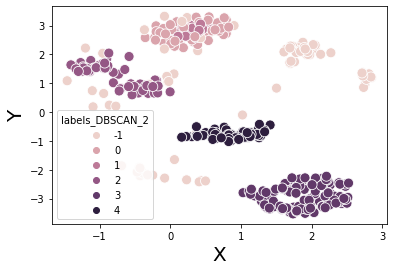

In [363]:
sns.scatterplot('PC1', 'PC2', data=customers_scale, s= 100, hue="labels_DBSCAN_2")
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()